# WeatherPy

---

In [176]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [177]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [178]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
        weather_response = requests.get(query_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bodaybo
Processing Record 2 of Set 1 | victoria
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | lethem
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | shache
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | mayo-belwa
Processing Record 15 of Set 1 | vilyuchinsk
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | san antonio
Processing Record 18 of Set 1 | upata
Processing Record 19 of Set 1 | khandyga
Processing Record 20 of Set 1 | mount isa
Processing Record 21 of Set 1 | lubango
Processing Record 22 of Set 1 | vila velha
Proces

In [179]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [180]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bodaybo,57.8506,114.1933,15.63,68,100,2.34,RU,1686539861
1,victoria,22.2855,114.1577,33.87,99,54,3.05,HK,1686539574
2,waitangi,-43.9535,-176.5597,12.12,88,100,0.45,NZ,1686539861
3,bethel,41.3712,-73.4140,20.36,75,75,3.60,US,1686539576
4,blackmans bay,-43.0167,147.3167,14.29,68,62,3.07,AU,1686539862


In [181]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [182]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bodaybo,57.8506,114.1933,15.63,68,100,2.34,RU,1686539861
1,victoria,22.2855,114.1577,33.87,99,54,3.05,HK,1686539574
2,waitangi,-43.9535,-176.5597,12.12,88,100,0.45,NZ,1686539861
3,bethel,41.3712,-73.4140,20.36,75,75,3.60,US,1686539576
4,blackmans bay,-43.0167,147.3167,14.29,68,62,3.07,AU,1686539862


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

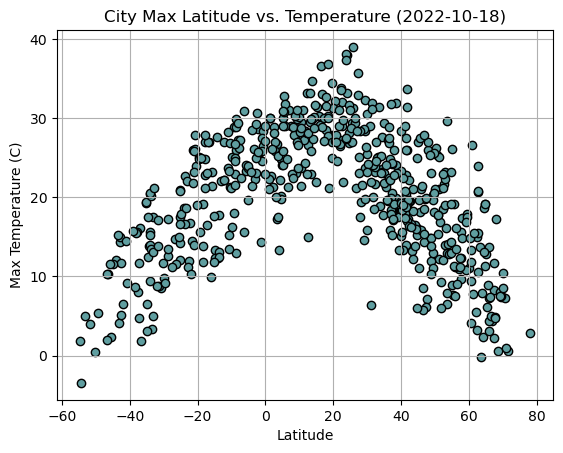

In [183]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

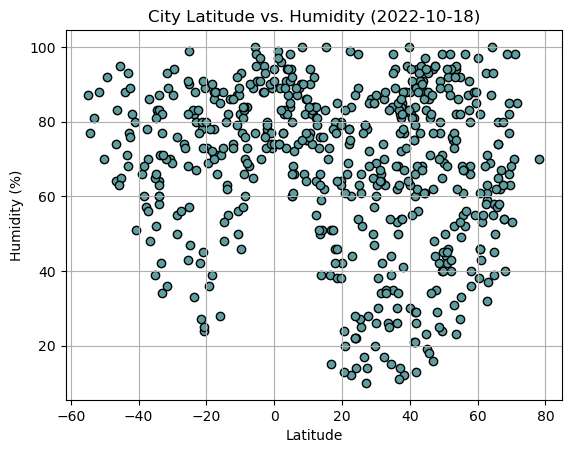

In [184]:
# Build scatter plot for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

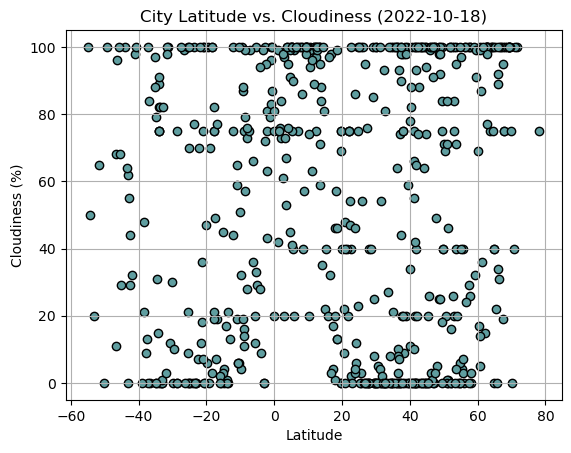

In [185]:
# Build scatter plot for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

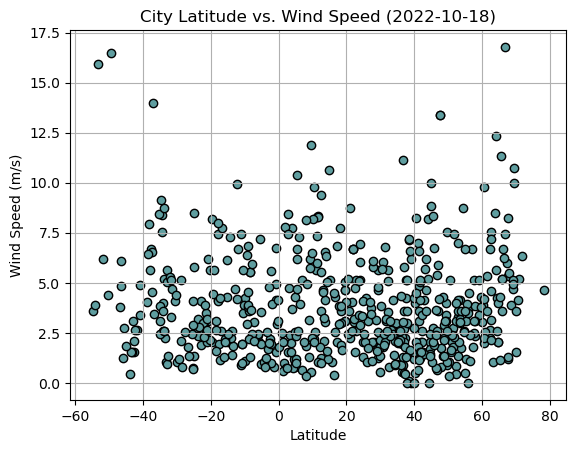

In [186]:
# Build scatter plot for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.scatter(x_axis, y_axis, marker="o", color="cadetblue",edgecolors='black')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [187]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bodaybo,57.8506,114.1933,15.63,68,100,2.34,RU,1686539861
1,victoria,22.2855,114.1577,33.87,99,54,3.05,HK,1686539574
3,bethel,41.3712,-73.4140,20.36,75,75,3.60,US,1686539576
6,longyearbyen,78.2186,15.6401,2.91,70,75,4.63,SJ,1686539862
7,lethem,3.3803,-59.7968,26.71,73,67,2.37,GY,1686539863


In [188]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waitangi,-43.9535,-176.5597,12.12,88,100,0.45,NZ,1686539861
4,blackmans bay,-43.0167,147.3167,14.29,68,62,3.07,AU,1686539862
5,invercargill,-46.4000,168.3500,10.27,83,96,4.84,NZ,1686539829
8,adamstown,-25.0660,-130.1015,20.88,57,70,5.77,PN,1686539863
9,port-aux-francais,-49.3500,70.2167,5.40,92,100,16.48,TF,1686539863


###  Temperature vs. Latitude Linear Regression Plot

The r-squared-value is 0.5124310459348568


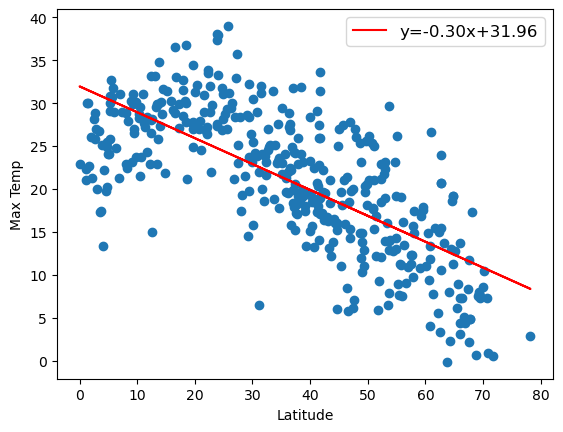

In [189]:
# Northern Hemisphere

# Calculate the correlation coefficient and a linear regression model
x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.5833005903593401


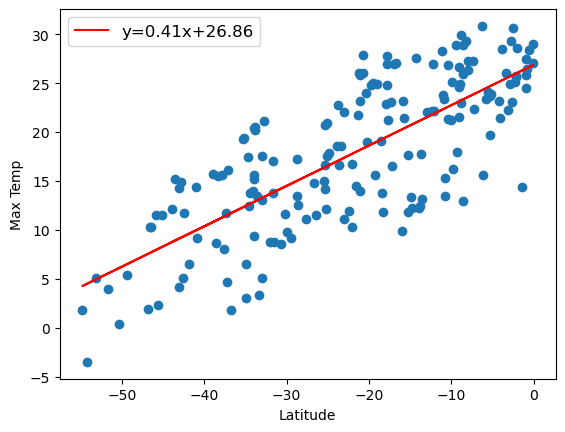

In [190]:
# Southern Hemisphere

# Calculate the correlation coefficient and a linear regression model
x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared-value is 0.010816796967508093


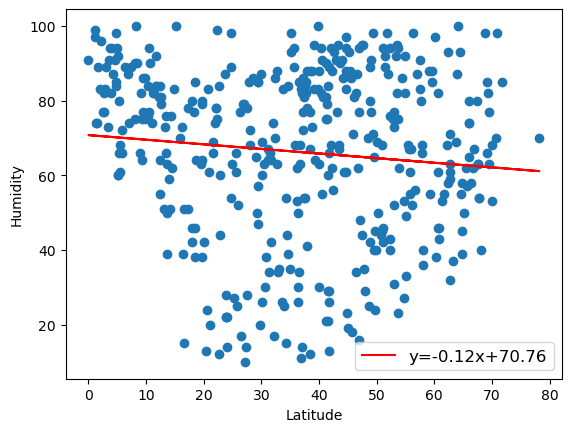

In [191]:
# Northern Hemisphere

# Calculate the correlation coefficient and a linear regression model
x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.02493590241032072


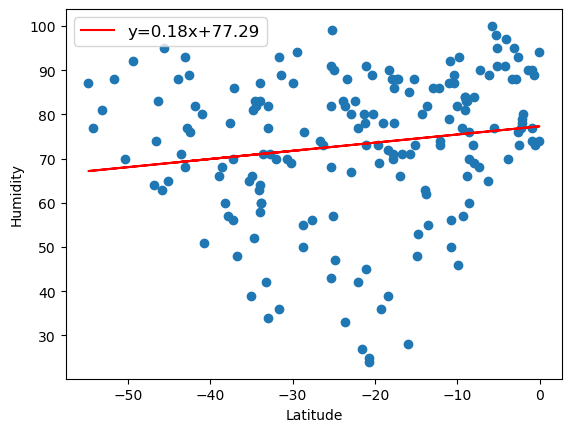

In [192]:
# Southern Hemisphere

x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared-value is 0.0045138956060469405


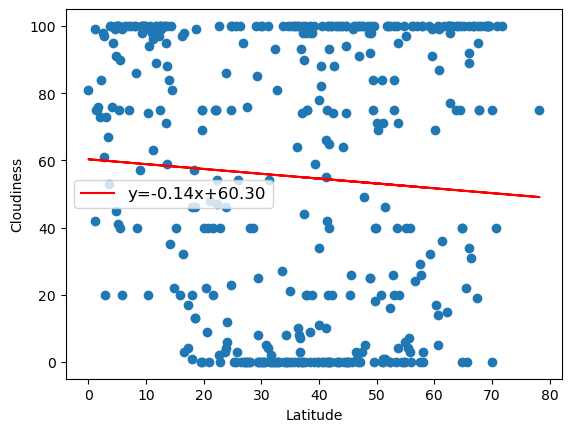

In [193]:
# Northern Hemisphere

x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.0012697613787753961


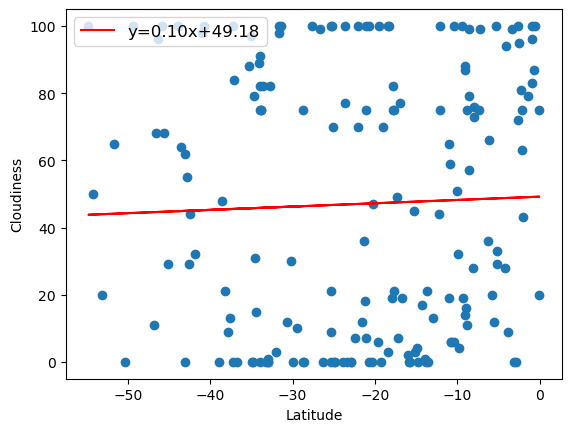

In [194]:
# Southern Hemisphere

x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

# slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared-value is 0.0033205235251627025


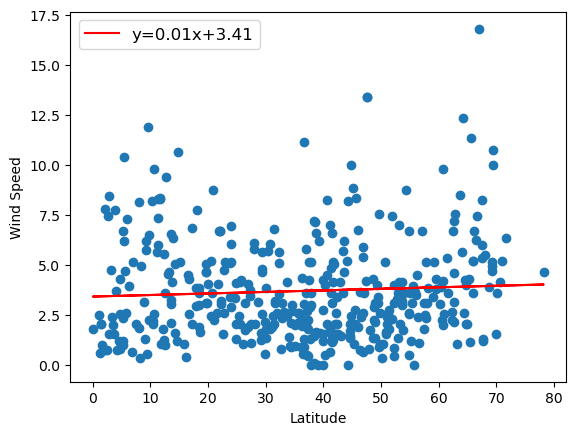

In [195]:
# Northern Hemisphere

x_axis  = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

## slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

The r-squared-value is 0.04843429922602501


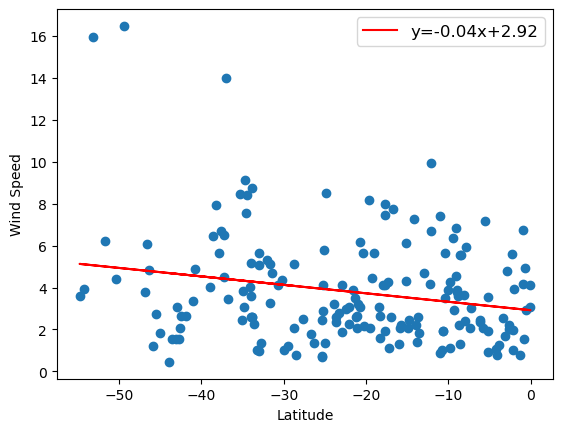

In [196]:
# Southern Hemishpere

x_axis  = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

## slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
p_fit = p_slope * x_axis + p_int

print (f"The r-squared-value is {p_r**2}")

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(x_axis, p_fit, color='r', label='y={:.2f}x+{:.2f}'.format(p_slope,p_int))
plt.legend(fontsize=12)
plt.scatter(x_axis,y_axis)

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE